In [2]:
from astropy import coordinates as coords
from astropy import units as u 
from astroquery.sdss import SDSS
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
co = coords.SkyCoord('0h8m05.63s +14d50m23.3s')
result = SDSS.query_region(co, spectro=True, radius=2*u.arcsec)
spec = SDSS.get_spectra(matches=result)
print(spec)

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f8538531060>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f85385307c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f851819cc70>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f851819d600>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f851819f1f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f85181cce20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f85181cea10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f85181f8640>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f85181fa230>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f85181fbd30>]]


In [3]:
co = coords.SkyCoord('0h8m05.63s +14d50m23.3s')
spec = SDSS.get_spectra(coordinates=co)
spec[0][1].data

FITS_rec([(30.596626, 3.5797, 0.06440803, 0,        0, 1.2189666 , 8.154254 , 36.077015),
          (33.245728, 3.5798, 0.        , 0,        0, 1.2187515 , 7.656426 , 34.99724 ),
          (35.89512 , 3.5799, 0.06292833, 0,        0, 1.2185355 , 7.231167 , 35.379208),
          ...,
          (53.27969 , 3.9635, 0.2728394 , 0,        0, 0.64196426, 4.1553526, 50.13611 ),
          (50.236168, 3.9636, 0.2806295 , 0,        0, 0.64184296, 4.2312737, 50.03317 ),
          (51.702717, 3.9637, 0.18243204, 0, 33554432, 0.64171964, 4.3413963, 50.208874)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [4]:
co = coords.SkyCoord('178h54m29.81s -00d46m14.20s')
spec = SDSS.get_spectra(coordinates=co)
spec[0][1].data

ValueError: Cannot parse first argument data "178h54m29.81s" for attribute ra

In [ ]:
spec[0][2].data

FITS_rec([('sdss', 'SDSS', 'chunk24', 'legacy', 'dr2001.10.1', 'good', 18.0661, 0., 5000., -1, 0., -9999., -1, 1, 1, 0, 0, 0, 0, 0, '    845594848269461504', '1237652943176138868', '1237652943176138868', '         7470579384473', '845550867804350464', 1, 'dr7', '26', '', -1, 0.96604282, 0.03413061, 0.2561179, 113.21073, -28.737019, 'GALAXY', 'SCIENCE', 6240, 0, 6240, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 751, 515, 52251, 160, [1739,    0,    3,  315,  153], 2.0234369, 14.839836, 'QSO', 'BROADLINE', 0.04559058, 3.6422865e-05, 3.6396828, 3751, 1.5546794, 'spEigenQSO-53724.fits', [ 0,  1,  2,  3, -1, -1, -1, -1, -1, -1], 3, [ 2.1908362e-03,  3.4339433e-03, -6.1753937e-03,  8.5440716e-03, -5.8567975e+02,  1.4279556e+03, -8.0151349e+02,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00], 0., 0., 0., 0., 0., 0., 0, 3799.2686, 9198.14, 0.3758, 0, 31.981264, [10.666473, 26.243982, 39.083405, 39.87929 , 30.720493], 1.5515354, [0.51277274, 0.21740288, 0.0811602 , 0.03698776, 0.01995743, 0.01224

Text(0, 0.5, 'flux')

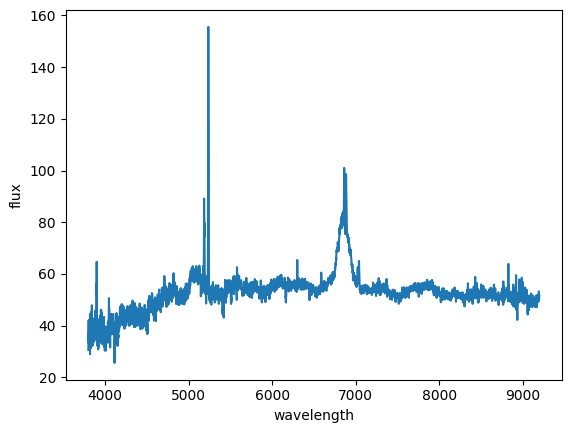

In [ ]:
data = spec[0][1].data
plt.plot(10**data['loglam'],data['flux'])
plt.xlabel('wavelength')
plt.ylabel('flux')

In [ ]:
from astropy.io import fits
#fits_table_filename = fits.util.get_testdata_filepath('spec-0285-51930-0309.fits')

hdul = fits.open('spec-0285-51930-0309.fits')
#hdul.byteswap().newbyteorder()
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3807 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

Text(0, 0.5, 'flux')

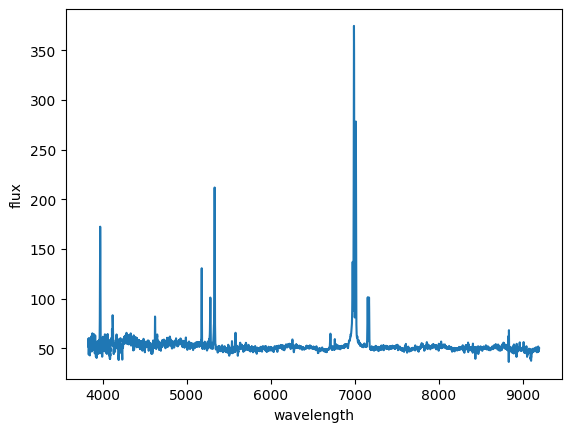

In [ ]:
data = hdul[1].data
data.byteswap().newbyteorder()
plt.plot(10**data['loglam'],data['flux'])
plt.xlabel('wavelength')
plt.ylabel('flux')

In [ ]:
import pandas as pd
lam = np.array(10**data['loglam'])
data_pd = {'lam': lam, 'flux': np.array(data['flux'])}
#location = 10**data['loglam']#
pdtable = pd.DataFrame(data_pd)
pdtable.head()

,lam,flux
0,3826.484131,55.312855
1,3827.366455,51.568661
2,3828.246826,59.850422
3,3829.129639,54.332668
4,3830.010498,54.771004


In [ ]:
# age_range = df.loc[(df['Age'] >= 30) & (df['Age'] <= 40), 'Age']
noise_range = pdtable.loc[(pdtable['lam'] > 7500) & (pdtable['lam'] < 8500), 'lam']
#noise_range.index[0]
#noise_range.index[-1]
#noise_range = pdtable[pdtable["lam"] > 7500]
flux_noise = pdtable.loc[noise_range.index[0]: noise_range.index[-1], 'flux']
#pdtable['flux'].loc[noise_range.index[0]]


#noise_range_flux = pdtable.loc[(pdtable['lam'] > 7500) & (pdtable['lam'] < 8500), 'lam']
#pdtable.iloc[2923:3466]
#print(noise_range)
#data_pd['flux']


In [ ]:
import numpy as np
flux_noise_std = np.std(flux_noise)
print(flux_noise_std)

1.885366


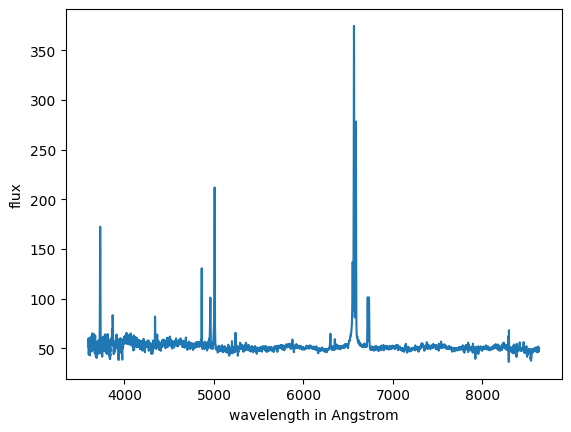

In [9]:
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 
import pandas as pd 
from astropy import coordinates as coords
from astropy.io import fits

class emission_lines(): 
    
    def __init__(self, filepath, z, snr):
        '''
        filepath (string): filepath to the spectrum data (fits format)
        z (float): redshift of the galaxy 
        snr (float): signal-to-noise ratio desired for emission-line detection threshold
        '''          
        hdul = fits.open(filepath)
        data = hdul[1].data
        data.byteswap().newbyteorder()
        self.lam = np.array(10**data['loglam'])
        self.flux = np.array(data['flux'])
        self.redshift = z
        self.snr = snr

    def line_detection(self): 
        """
        This function will detect peaks by....
        INPUTS:
        variables defined above
        OUTPUTS: 
        1. Pandas dataframe containing the observed and emitted wavelengths of detected emission lines.
        2. Figure showing the spectrum with detected emission-lines indicated by a vertical line.
        """
        #redshift correct the wavelengths to define consistant noise range
        corrected_lam = self.lam/(1+self.redshift)
        # putting the spectrum data into a pandas dataframe
        df = {'obs lam': self.lam, 'emit lam': corrected_lam, 'flux': self.flux}
        pdtable = pd.DataFrame(df)

        #defining a noise range and getting the noise value
        noise_range = pdtable.loc[(pdtable['emit lam'] > 7000) & (pdtable['emit lam'] < 8000), 'emit lam']
        flux_noise = pdtable.loc[noise_range.index[0]: noise_range.index[-1], 'flux']
        flux_noise_std = np.std(flux_noise)

        #line detection 

        #plotting the spectrum with the lines detected
        fig = plt.figure()
        plt.plot(pdtable["emit lam"], pdtable["flux"])
        plt.xlabel("wavelength in Angstrom")
        plt.ylabel("flux")
        return pdtable, fig
    '''
    def line_identification(self, ): 
        #line identification

        return Table
        '''

el = emission_lines('spec-0285-51930-0309.fits', 0.06456, 3)
table, figure = el.line_detection()
#print(table)
plt.show()

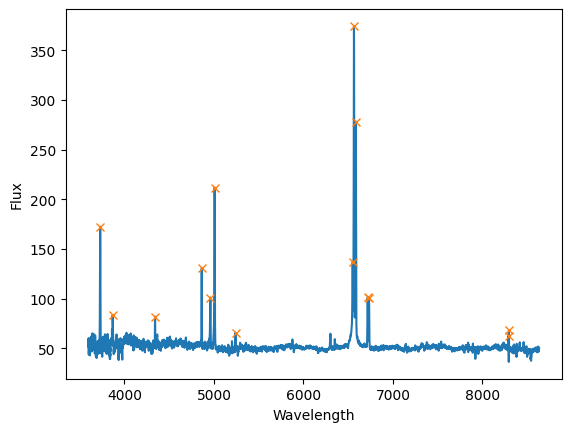

In [43]:
from scipy.signal import find_peaks
from astropy.table import Table

#convert to astropy table to avoid endian buffer error 
new_table = Table.from_pandas(table) #table from python function 1 output

peaks, props = find_peaks(new_table["flux"], prominence=23) #mess with arguments to get better peak finding, normalize spectra first

plt.plot(new_table["emit lam"], new_table["flux"])
plt.plot(new_table["emit lam"][peaks], new_table["flux"][peaks], 'x')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

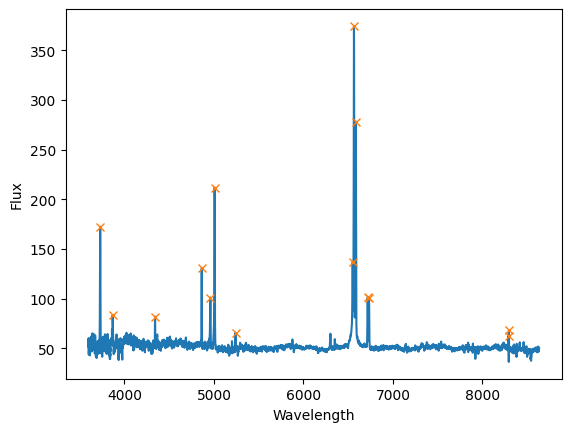

 obs lam   emit lam    flux   
--------- --------- ----------
 3969.173 3728.4634  172.43918
4117.1807 3867.4949   83.37697
4621.6807    4341.4   82.06383
 5177.259 4863.2847  130.62817
5279.5874 4959.4077  101.14913
 5330.893  5007.602  211.83638
5579.5596  5241.188  65.736084
6974.2886  6551.334  137.02751
 6988.757  6564.925   374.3807
7011.3223  6586.122  278.23386
 7153.195 6719.3906   101.4515
7168.0347 6733.3306 101.177956
 8828.765  8293.346   62.57515
 8832.833  8297.167   68.33572


In [51]:
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 
import pandas as pd 
from astropy import coordinates as coords
from astropy.io import fits

class emission_lines(): 
    
    def __init__(self, filepath, z, snr):
        '''
        filepath (string): filepath to the spectrum data (fits format)
        z (float): redshift of the galaxy 
        snr (float): signal-to-noise ratio desired for emission-line detection threshold
        '''          
        hdul = fits.open(filepath)
        data = hdul[1].data
        self.lam = np.array(10**data['loglam'])
        self.flux = np.array(data['flux'])
        self.redshift = z
        self.snr = snr

    def line_detection(self): 
        """
        This function will detect peaks by....
        INPUTS:
        variables defined above
        OUTPUTS: 
        1. Pandas dataframe containing the observed and emitted wavelengths of detected emission lines.
        2. Figure showing the spectrum with detected emission-lines indicated by a vertical line.
        """
        #redshift correct the wavelengths to define consistant noise range
        corrected_lam = self.lam/(1+self.redshift)
        # putting the spectrum data into a pandas dataframe
        df = {'obs lam': self.lam, 'emit lam': corrected_lam, 'flux': self.flux}
        pdtable = pd.DataFrame(df)
        new_table = Table.from_pandas(pdtable)
        #defining a noise range and getting the noise value
        #noise_range = new_table.loc[(new_table['emit lam'] > 7000) & (new_table['emit lam'] < 8000), 'emit lam']
        #flux_noise = new_table.loc[noise_range.index[0]: noise_range.index[-1], 'flux']
        #flux_noise_std = np.std(flux_noise)

        #plotting the spectrum with the lines detected
        peaks, props = find_peaks(new_table["flux"], prominence=23) #mess with arguments to get better peak finding, normalize spectra first
        #new_table['peak_lam'] = new_table["emit lam"][peaks]
        results = [new_table["obs lam"][peaks], new_table["emit lam"][peaks], new_table["flux"][peaks]]
        results_table = Table(results)

        fig = plt.figure()
        plt.plot(new_table["emit lam"], new_table["flux"])
        plt.plot(new_table["emit lam"][peaks], new_table["flux"][peaks], 'x')
        plt.xlabel('Wavelength')
        plt.ylabel('Flux')
        plt.show()

        return results_table, fig
    '''
    def line_identification(self, ): 
        #line identification

        return Table
        '''

el = emission_lines('spec-0285-51930-0309.fits', 0.06456, 3)
el_table, figure = el.line_detection()
print(el_table)
plt.show()

In [3]:
import pandas as pd
defined_lines = pd.read_csv('defined_optical_lines.csv')

In [4]:
defined_lines.head()

,wavelength,ion,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,770.409,Ne VIII,NaN,NaN,NaN,NaN,NaN
1,780.324,Ne VIII,NaN,NaN,NaN,NaN,NaN
2,937.814,Ly_,NaN,NaN,NaN,NaN,NaN
3,949.742,Ly_,NaN,NaN,NaN,NaN,NaN
4,977.030,C III,NaN,NaN,NaN,NaN,NaN


In [5]:
defined_lines = np.array(defined_lines['wavelength'])

0        770.409
1        780.324
2        937.814
3        949.742
4        977.030
         ...    
227    10320.490
228    10336.410
229    10746.800
230    10830.340
231    10938.086
Name: wavelength, Length: 232, dtype: float64

[O II]


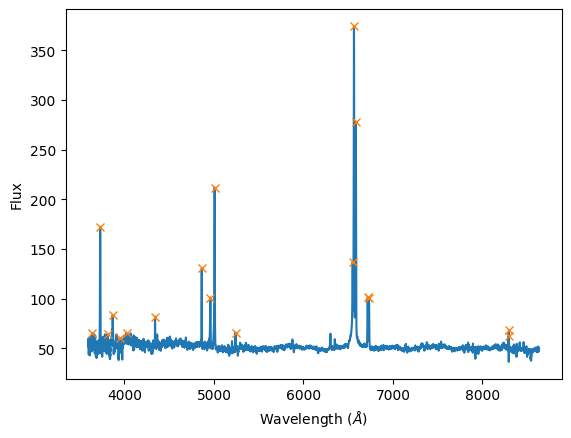

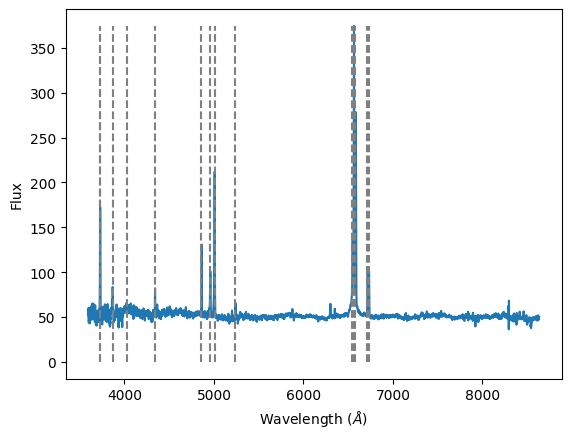

(    Atomic Wavelength   Found Peak Ion Match
 0            3726.032  3723.740496    [O II]
 1            3728.815  3728.323545    [O II]
 2            3868.760  3867.349844  [Ne III]
 3            4026.190  4022.662412      He I
 4            4340.471  4339.705375        H_
 5            4861.333  4859.563469        H_
 6            4958.911  4958.600453   [O III]
 7            5006.843  5006.271711   [O III]
 8            5236.060  5231.128359   [Fe IV]
 9            6548.050  6545.011426    [N II]
 10           6562.819  6560.959137        H_
 11           6583.460  6581.044961    [N II]
 12           6716.440  6713.741270    [S II]
 13           6730.810  6728.541934    [S II],
 <Figure size 640x480 with 1 Axes>)

In [3]:
from spectroSLEUTH import sleuth 
el = sleuth.emission_lines('spec-0285-51930-0309.fits', 0.0646)
results_table, fig = el.line_detection()
el.line_identification(results_table)

spectroSLEUTH installed: beta version


FileNotFoundError: [Errno 2] No such file or directory: '/line_data/defined_optical_lines.csv'

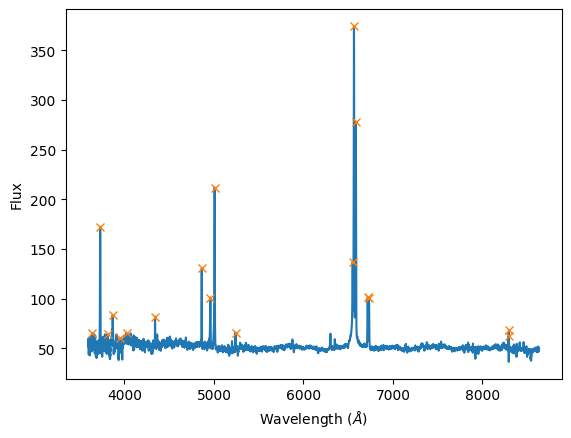

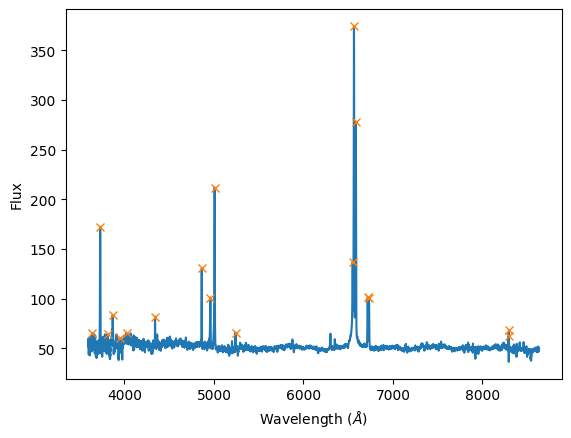

In [1]:
from spectroSLEUTH import sleuth

el = sleuth.emission_lines('/Users/leafeuillet/codeastro/spectroSLEUTH/tests/test_spectrum_1.fits', 0.0646, prominence=20)
el.line_detection()
el.line_identification()